In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline

In [2]:
sourceImage = cv.imread('imagem-inicial.jpeg', cv.IMREAD_GRAYSCALE)
sourceImage1 = cv.imread('imagem-inicial.jpeg')

In [3]:
frameInicial = cv.cvtColor(sourceImage1, cv.cv2.COLOR_BGR2YCrCb)[:, :, 0]

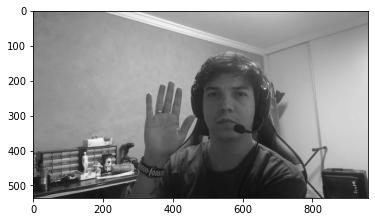

In [7]:
plt.imshow(frameInicial,cmap="gray")

In [8]:
h,w = (np.array(sourceImage.shape[:2])/8 * 8).astype(int)

In [9]:
sourceImage = sourceImage[:h,:w]

In [10]:
sourceImage

array([[117, 117, 116, ..., 139, 138, 138],
       [117, 117, 117, ..., 138, 138, 138],
       [117, 117, 117, ..., 139, 138, 138],
       ...,
       [ 43,  44,  43, ...,  41,  44,  49],
       [ 42,  44,  43, ...,  38,  41,  48],
       [ 48,  51,  54, ...,  36,  40,  47]], dtype=uint8)

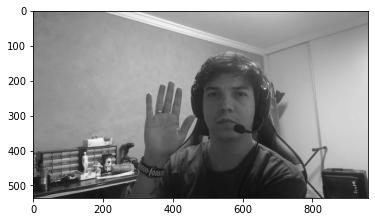

In [11]:
plt.imshow(sourceImage,cmap="gray")

In [12]:
dct = cv.dct(sourceImage.astype(float))

In [14]:
dct[:10,:10]

array([[ 9.37483588e+04, -2.11712126e+03,  1.36069181e+04,
        -1.26891356e+04, -4.18192683e+03,  2.20097100e+03,
        -2.31881942e+03,  5.03913252e+02,  1.64565683e+02,
        -4.38927363e+02],
       [ 2.24490674e+04,  1.85452534e+02, -9.96129102e+03,
         8.08574210e+02,  5.48439334e+02,  1.12109537e+03,
         2.89254809e+03, -2.30871635e+03,  6.34666424e+02,
         5.07232490e+02],
       [-1.01054606e+04,  2.31454707e+03, -9.79854083e+03,
         5.86615119e+03,  8.95578020e+02, -1.57832861e+03,
         1.70494332e+02, -5.54688809e+00, -7.06463706e+02,
        -9.91849563e+01],
       [ 6.80672486e+03, -2.22321022e+03,  5.85922885e+02,
         4.55643528e+02,  8.33741921e+02, -1.45239712e+03,
        -4.47279108e+02,  1.53476086e+03,  4.84587003e+02,
        -6.23555006e+02],
       [-3.64343610e+03,  1.30926609e+03, -1.51700263e+03,
         1.54779169e+03, -1.71594122e+03,  5.79965484e+02,
         4.31780701e+01,  1.74890782e+03, -8.15880571e+02,
        -7.

In [63]:
lh = int(round(10 - ((compressRatio/100) * h)))
lw = int(round(10 - ((compressRatio/100) * w)))

NameError: name 'compressRatio' is not defined

In [132]:
print(lh,lw)

214 384


In [55]:
B = 100

blocksV = int(h/B) #definindo numero de blocos na vertical
blocksH = int(w/B) #definindo numero de blocos na horizontal

sourceVis = np.zeros((blocksV*B,blocksH*B)) #matriz "holder" de zeros para a visualizacao da imagem original
transformed = np.zeros((blocksV*B,blocksH*B)) #matriz "holder" de zeros para a imagem transformada

sourceVis[:blocksV*B,:blocksH*B] = sourceImage[:blocksV*B,:blocksH*B] #copia da imagem original com o tamanho correto

print(sourceVis.shape)

#aplicacao da DCT em cada bloco de BxB da imagem
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv.dct(sourceVis[row*B:(row+1)*B,col*B:(col+1)*B])
                currentblock[10:100,10:100] = 0
                transformed[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock

(500, 900)


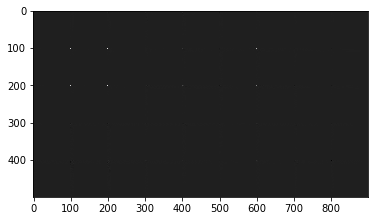

In [56]:
plt.imshow(transformed,cmap="gray")

In [57]:
backTransformed = np.zeros((blocksV*B,blocksH*B)) #matriz "holder" de zeros para a guardar a inversa da DCT

#aplicando a inversa da DCT com o objetivo de ter a imagem original
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv.idct(transformed[row*B:(row+1)*B,col*B:(col+1)*B])
                backTransformed[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock

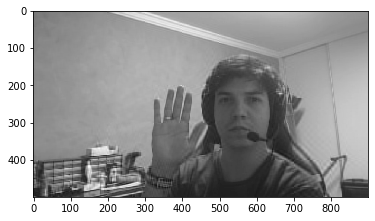

In [58]:

plt.imshow(backTransformed,cmap="gray")

In [82]:
diff = sourceVis - backTransformed
diffsq = diff**2
tam = diffsq.shape[0] * diffsq.shape[1]

MSE = np.sum(diffsq)/tam
print(MSE)

33.495329957840084


In [89]:
PSNR = (20 * np.log10(255)) - (10 * np.log10(MSE))

In [90]:
PSNR

32.88096100545138

In [61]:
np.sum(a**2) / np.sum(a**2)

Image original size:    0.491 MB
Image original size:    0.429 MB


In [62]:
plt.imshow(dct[0:50,0:50],cmap="gray")

NameError: name 'dct' is not defined

In [149]:
compressRatio = 99

In [150]:
lh = int(round(h - ((compressRatio/100) * h)))
lw = int(round(w - ((compressRatio/100) * w)))

In [151]:
print(lh, lw)

5 10


In [66]:
for i in range(10,100, 10):
    print(i)

10
20
30
40
50
60
70
80
90


In [152]:
dct[lh:h, lw:w] = 0

In [153]:
idct = cv.idct(dct)

In [2]:
import time

In [11]:
start = time.process_time()

In [12]:
final = time.process_time() - start

0.01249992600000005

In [16]:
timeaggr = final * 2 / 2
timeaggr

0.01249992600000005

In [10]:
plt.imshow(sourceImage,cmap="gray")

NameError: name 'plt' is not defined

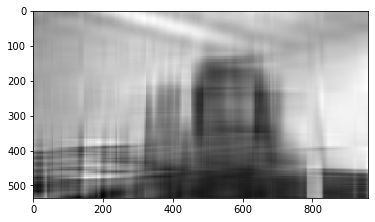

In [155]:
plt.imshow(idct,cmap="gray")

In [78]:
a = np.ndarray([[1,2,3],[4,5,6],[7,8,9]])
b = np.ndarray([[6,7,2],[-4,6,-6],[10,29,3]])

TypeError: 'list' object cannot be interpreted as an integer

In [74]:
c = a - b

In [76]:
c

array([[ -5,  -5,   1],
       [  8,  -1,  12],
       [ -3, -21,   6]])

In [80]:
np.sum(c**2) / np.sum(a**2)

2.617543859649123